In [1]:
#When should I use a "groupby" in pandas
import pandas as pd

In [2]:
# read a dataset of alcohol consumption into a DataFrame
drinks = pd.read_csv('drinks.csv')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [3]:
# calculate the mean beer servings across the entire dataset
drinks.beer_servings.mean()

106.16062176165804

In [4]:
# calculate the mean beer servings just for countries in Africa
drinks[drinks.continent=='Africa'].beer_servings.mean()

61.471698113207545

In [12]:
# calculate the mean beer servings for each continent
drinks.groupby('country').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
country,,,,
Afghanistan,0,0,0,0.0
Albania,89,132,54,4.9
Algeria,25,0,14,0.7
Andorra,245,138,312,12.4
Angola,217,57,45,5.9
Antigua & Barbuda,102,128,45,4.9
Argentina,193,25,221,8.3
Armenia,21,179,11,3.8
Australia,261,72,212,10.4


In [15]:
drinks.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


In [16]:
# other aggregation functions (such as 'max') can also be used with groupby
drinks.groupby('continent').beer_servings.max()

continent
Africa           376
Asia             247
Europe           361
North America    285
Oceania          306
South America    333
Name: beer_servings, dtype: int64

In [19]:
# multiple aggregation functions can be applied simultaneously
drinks.groupby('continent').beer_servings.agg(['mean','max','count','min'])

,mean,max,count,min
continent,,,,
Africa,61.471698,376,53,0
Asia,37.045455,247,44,0
Europe,193.777778,361,45,0
North America,145.434783,285,23,1
Oceania,89.687500,306,16,0
South America,175.083333,333,12,93


In [21]:
# specifying a column to which the aggregation function should be applied is not required
drinks.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


In [22]:
drinks.groupby('continent').agg(['mean','count','max','min'])

beer_servings                spirit_servings                 \
                       mean count  max min            mean count  max min   
continent                                                                   
Africa            61.471698    53  376   0       16.339623    53  152   0   
Asia              37.045455    44  247   0       60.840909    44  326   0   
Europe           193.777778    45  361   0      132.555556    45  373   0   
North America    145.434783    23  285   1      165.739130    23  438  68   
Oceania           89.687500    16  306   0       58.437500    16  254   0   
South America    175.083333    12  333  93      114.750000    12  302  25   

              wine_servings                total_litres_of_pure_alcohol        \
                       mean count  max min                         mean count   
continent                                                                       
Africa            16.264151    53  233   0                     3.007547    53   
Asia               9.068182    44  123   0                     2.170455    44   
Europe           142.222222    45  370   0                     8.617778    45   
North America     24.521739    23  100   1                     5.995652    23   
Oceania           35.625000    16  212   0                     3.381250    16   
South America     62.416667    12  221   1                     6.308333    12   

                          
                max  min  
continent                 
Africa          9.1  0.0  
Asia           11.5  0.0  
Europe         14.4  0.0  
North America  11.9  2.2  
Oceania        10.4  0.0  
South America   8.3  3.8

In [27]:
# allow plots to appear in the notebook
%matplotlib inline


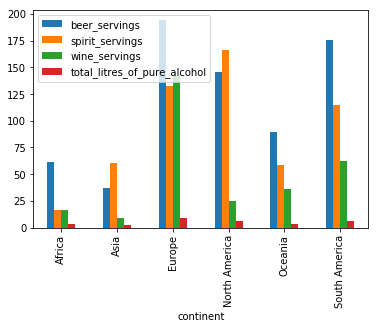

In [30]:
# side-by-side bar plot of the DataFrame directly above
drinks.groupby('continent').mean().plot(kind='bar')

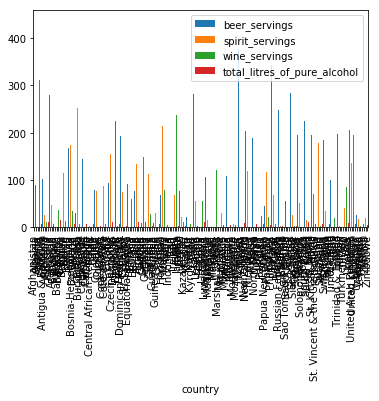

In [32]:
drinks.groupby('country').mean().plot(kind='bar')

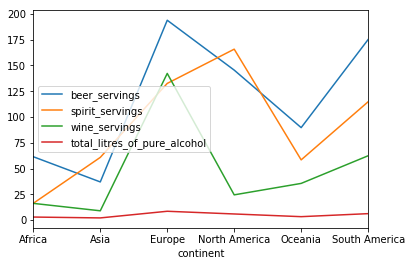

In [34]:
drinks.groupby('continent').mean().plot(kind='line')

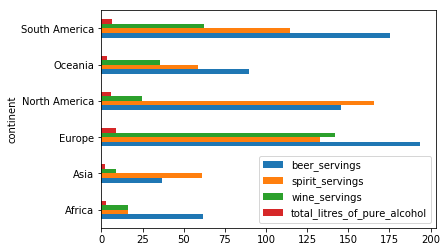

In [35]:
drinks.groupby('continent').mean().plot(kind='barh')

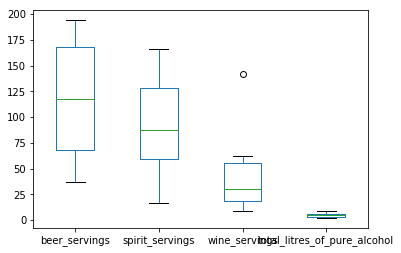

In [36]:
drinks.groupby('continent').mean().plot(kind='box')

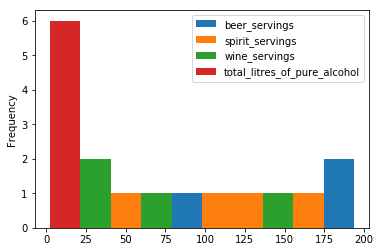

In [37]:
drinks.groupby('continent').mean().plot(kind='hist')

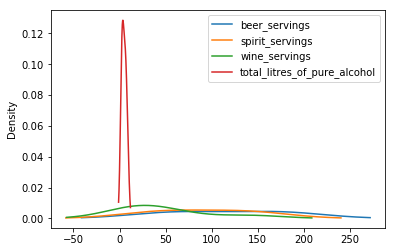

In [40]:
drinks.groupby('continent').mean().plot(kind='kde')

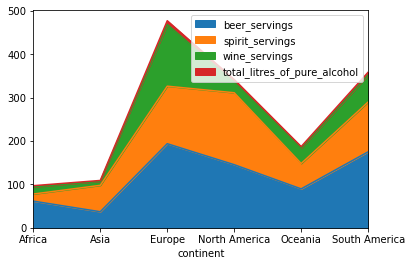

In [42]:
drinks.groupby('continent').mean().plot(kind='area')

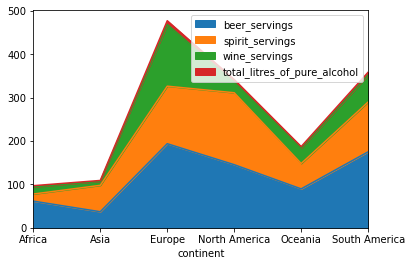

In [49]:
drinks.groupby('continent').mean().plot(kind='area')

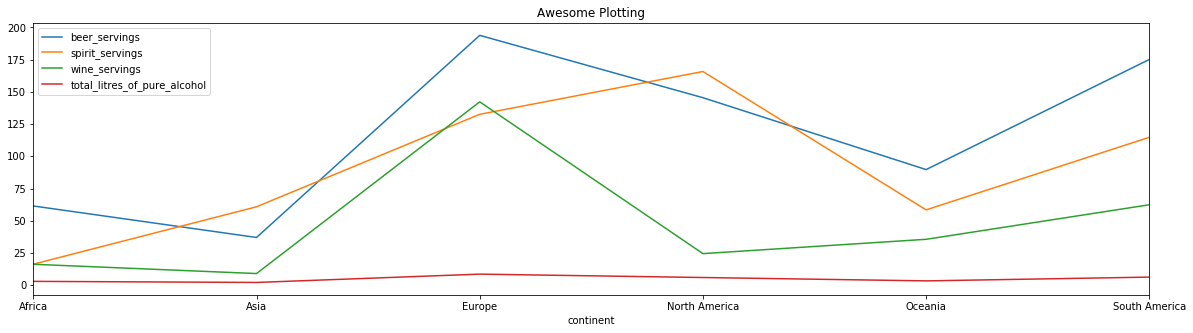

In [53]:
drinks.groupby('continent').mean().plot(kind='line',figsize=(20,5),title="Awesome Plotting")